In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
# load data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('X_train.shape:', x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train.shape: (60000, 28, 28)


In [8]:
# build model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# train model
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2947 - accuracy: 0.9141 - val_loss: 0.1449 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1472 - accuracy: 0.9568 - val_loss: 0.1018 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 0.0914 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0897 - accuracy: 0.9717 - val_loss: 0.0806 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.0810 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0689 - accuracy: 0.9777 - val_loss: 0.0774 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0587 - accuracy: 0.9811 - val_loss: 0.0761 - val_accuracy:

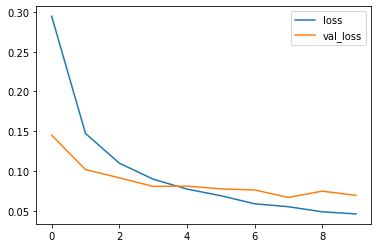

In [15]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

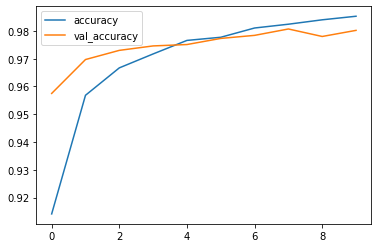

In [16]:
# plot accurance per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [18]:
# evaluate model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9802
[0.06925710290670395, 0.9801999926567078]


In [31]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):

# '''This function plots the confusion matrix.
# Normalization can be applied by setting to True.
# '''

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
           horizontalalignment='center',
           color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

313/313 [==============================] - 1s 2ms/step
confusion matrix, without normalization
[[ 969    0    2    1    0    1    4    1    2    0]
 [   0 1123    3    0    0    0    3    1    5    0]
 [   2    0 1018    1    1    0    2    4    4    0]
 [   1    0    2  986    0   12    0    6    2    1]
 [   0    0    5    0  965    0    2    1    2    7]
 [   2    0    0    2    1  882    4    0    0    1]
 [   4    2    0    1    3    4  941    0    3    0]
 [   0    2   11    1    0    0    0 1008    1    5]
 [   6    0    4    2    5   10    3    3  937    4]
 [   3    2    0    6   13    4    0    4    4  973]]


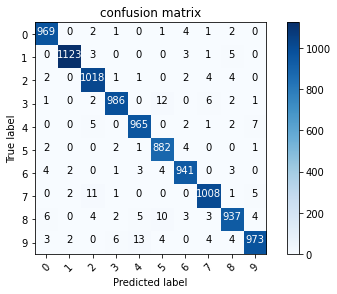

In [32]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))

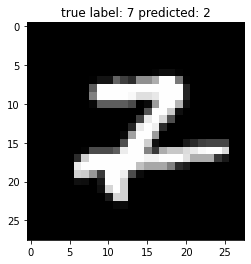

In [36]:
# show misclassified
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("true label: %s predicted: %s" % (y_test[i], p_test[i]));